In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/mushroom-classification/mushrooms.csv


In [3]:
#importing all the required packages for the project.
#1.matplot library used for ploting graph. 
#2.tensorflow library is used for Machine Learning.
#3.Keras is imported from tensorflow for the usage of dummies in ML part of the project. 
#4.Sklearn.model_selection is imported for the Cross Validation and train_test_split for better prediction score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [4]:
#importing the Mushroom dataset to work on it and analyze the data 
import pandas as pd
mushrooms_df = pd.read_csv("../input/mushroom-classification/mushrooms.csv")

In [5]:
#the tuple dataset.shape is performed here to check the dimensions(rows and columns) of the dataset
mushrooms_df.shape

(8124, 23)

In [6]:
#checking the dataset with describe method
mushrooms_df.describe()
#after checking the dataset we get to know that the odor is more effective info for getting that the mushroom is poisonous or edible

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
#Using the groupby fuction to get the total count
mushrooms_df.groupby(['class','odor']).count()
#After the groupby is performed we get to know that there is only one overlapping in the data(i.e n)

cap-shape  cap-surface  cap-color  bruises  gill-attachment  \
class odor                                                                
e     a           400          400        400      400              400   
      l           400          400        400      400              400   
      n          3408         3408       3408     3408             3408   
p     c           192          192        192      192              192   
      f          2160         2160       2160     2160             2160   
      m            36           36         36       36               36   
      n           120          120        120      120              120   
      p           256          256        256      256              256   
      s           576          576        576      576              576   
      y           576          576        576      576              576   

            gill-spacing  gill-size  gill-color  stalk-shape  stalk-root  ...  \
class odor                                                                ...   
e     a              400        400         400          400         400  ...   
      l              400        400         400          400         400  ...   
      n             3408       3408        3408         3408        3408  ...   
p     c              192        192         192          192         192  ...   
      f             2160       2160        2160         2160        2160  ...   
      m               36         36          36           36          36  ...   
      n              120        120         120          120         120  ...   
      p              256        256         256          256         256  ...   
      s              576        576         576          576         576  ...   
      y              576        576         576          576         576  ...   

            stalk-surface-below-ring  stalk-color-above-ring  \
class odor                                                     
e     a                          400                     400   
      l                          400                     400   
      n                         3408                    3408   
p     c                          192                     192   
      f                         2160                    2160   
      m                           36                      36   
      n                          120                     120   
      p                          256                     256   
      s                          576                     576   
      y                          576                     576   

            stalk-color-below-ring  veil-type  veil-color  ring-number  \
class odor                                                               
e     a                        400        400         400          400   
      l                        400        400         400          400   
      n                       3408       3408        3408         3408   
p     c                        192        192         192          192   
      f                       2160       2160        2160         2160   
      m                         36         36          36           36   
      n                        120        120         120          120   
      p                        256        256         256          256   
      s                        576        576         576          576   
      y                        576        576         576          576   

            ring-type  spore-print-color  population  habitat  
class odor                                                     
e     a           400                400         400      400  
      l           400                400         400      400  
      n          3408               3408        3408     3408  
p     c           192                192         192      192  
      f          2160               2160        2160     2160  
      m            36           

In [8]:
#labels include the class from the dataset which furture includes information about poisonous or edible
labels = mushrooms_df['class']
#In features we are using drop method to drop the class column to get all other features with non p and e value
features = mushrooms_df.drop(columns=['class'])

In [9]:
#printing the labels first five data
labels[0:5]

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

In [10]:
#printing the features first five data
features[0:5]

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [11]:
#replacing the labels p values to 0
labels.replace('p',0,inplace=True)
#replacing the labels e values to  1
labels.replace('e',1,inplace=True)
#printing the labels new first five data
labels[0:5]

0    0
1    1
2    1
3    0
4    1
Name: class, dtype: int64

In [12]:
#making the dummy of features data with 0 and 1 values using the pandas library 
features = pd.get_dummies(features)
#printing the new features data
features[0:5]

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [13]:
#converting the dataframe values of features and labels as thier own matrix values for each row 
features = features.values.astype('float32')
labels = labels.values.astype('float32')

In [14]:
#Spliting the data into three parts 1.TrainingSet 2.ValidationSet and 3.TestingSet using the train_test_split for the Machine Learning Algorithm  
#TrainingSet for training our ML model
#ValidationSet for checking the overfitting of the ML model
#Testingset for testing our model at the end 
features_train, features_test, labels_train, labels_test = train_test_split(features,labels,test_size=0.2)
features_train, features_validation, labels_train, labels_validation = train_test_split(features_train, labels_train, test_size=0.2)

In [15]:
#So,here is our Machine learning model for training and testing the data
#Model concludes sequential method in that we have given the first Dense layer(input layer) with nodes and input_shape
#Then the Second Dense layer(Hidden layer) consists of nodes again and activation function with Rectified Activation Unit(relu) 
#then the Third Dense layer(Output layer) consists of nodes again and activation function with softmax because we expect only two outputs either poisonous or edible
model = keras.Sequential([keras.layers.Dense(32, input_shape=(117,)),
                         keras.layers.Dense(20, activation=tf.nn.relu),
                         keras.layers.Dense(2, activation='softmax')])

In [16]:
#compiling our model using parameters like optimizer(Adaptive Moment Estimation-adam ),
#loss fuction(consist what to minimize as algo progresses i.e crossentropy),
#then the matrics with kwargs in it which refers to accuracy of our prediction
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

In [17]:
#fitting the data to the model with some parameters
#history is a variable cosisting the parameters
#epochs consists the number of time we want to repeat this training
history = model.fit(features_train, labels_train, epochs=20, validation_data=(features_validation, labels_validation))

Train on 5199 samples, validate on 1300 samples
Epoch 1/20
5199/5199 [==============================] - 1s 182us/sample - loss: 0.1448 - acc: 0.9565 - val_loss: 0.0165 - val_acc: 0.9969
Epoch 2/20
5199/5199 [==============================] - 0s 68us/sample - loss: 0.0103 - acc: 0.9990 - val_loss: 0.0053 - val_acc: 0.9992
Epoch 3/20
5199/5199 [==============================] - 0s 71us/sample - loss: 0.0036 - acc: 0.9996 - val_loss: 0.0029 - val_acc: 1.0000
Epoch 4/20
5199/5199 [==============================] - 0s 73us/sample - loss: 0.0017 - acc: 0.9998 - val_loss: 0.0019 - val_acc: 1.0000
Epoch 5/20
5199/5199 [==============================] - 0s 75us/sample - loss: 9.2559e-04 - acc: 1.0000 - val_loss: 9.1276e-04 - val_acc: 1.0000
Epoch 6/20
5199/5199 [==============================] - 0s 92us/sample - loss: 5.7655e-04 - acc: 1.0000 - val_loss: 6.9163e-04 - val_acc: 1.0000
Epoch 7/20
5199/5199 [==============================] - 0s 70us/sample - loss: 3.9502e-04 - acc: 1.0000 - val_los

In [18]:
#after the Machine Learning process we need to test our data and then print the performance
prediction_features = model.predict(features_test)
performance = model.evaluate(features_test, labels_test)
print(performance)

1625/1625 [==============================] - 0s 39us/sample - loss: 7.5758e-05 - acc: 1.0000
[7.575786926183635e-05, 1.0]


In [19]:
#getting the history of used variables in machine learning model
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

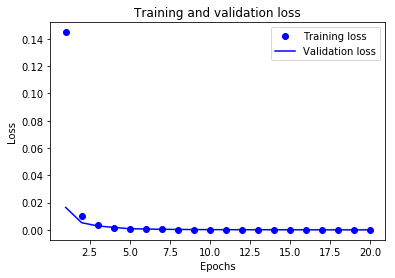

In [20]:
# Checking Overfit
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()